# Exploratory Data Analysis
Short EDA to load the data and look at dimensions and size of the data set.

In [ ]:
# install relevant packages
import numpy as np
import matplotlib.pyplot as plt
from monai.transforms import LoadImage
from monai.data import Dataset, DataLoader
import os.path

In [ ]:
data_path = "/cluster/projects/vc/data/mic/open/HNTS-MRG/train"

## Task 1: preRT data

In [42]:
data_preRT = []
for study in range(0, 202):
    patient_nr_as_str = str(study)
    patient_path = f"{data_path}/{patient_nr_as_str}/preRT/"
    if os.path.isdir(patient_path):
        image_path = patient_path + f"{patient_nr_as_str}_preRT_T2.nii.gz"
        mask_path = patient_path + f"{patient_nr_as_str}_preRT_mask.nii.gz"
        if os.path.exists(image_path) and os.path.exists(mask_path):
            data_preRT.append({"image_path": image_path, "mask_path": mask_path})


print(data_preRT[:2])
print(len(data_preRT))
        


[{'image_path': '/cluster/projects/vc/data/mic/open/HNTS-MRG/train/2/preRT/2_preRT_T2.nii.gz', 'mask_path': '/cluster/projects/vc/data/mic/open/HNTS-MRG/train/2/preRT/2_preRT_mask.nii.gz'}, {'image_path': '/cluster/projects/vc/data/mic/open/HNTS-MRG/train/3/preRT/3_preRT_T2.nii.gz', 'mask_path': '/cluster/projects/vc/data/mic/open/HNTS-MRG/train/3/preRT/3_preRT_mask.nii.gz'}]
130


We collect all of the preRT training data in data_preRT and observe that there are 130 training instances.

### Visualize a 2D slice of an image and the corresponding mask

torch.Size([512, 512, 83])


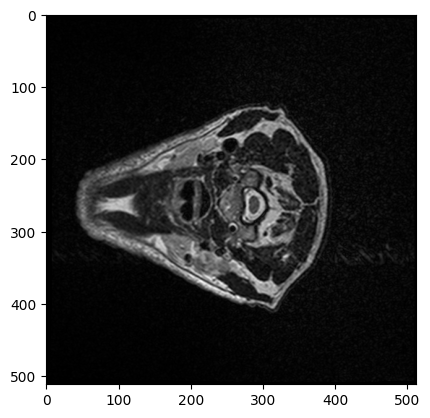

In [43]:
img_loader = LoadImage(image_only=True)
img_data = img_loader(data_preRT[0].get("image_path"))
print(img_data.shape)
plt.imshow(img_data[:, :, 43], cmap='gray')

torch.Size([512, 512, 83])


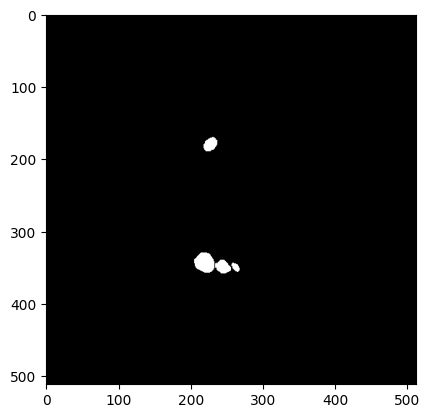

In [44]:
img_loader = LoadImage(image_only=True)
img_data = img_loader(data_preRT[0].get("mask_path"))
print(img_data.shape)
plt.imshow(img_data[:, :, 43], cmap='gray')

## Task 2: midRT data
Here we have access to midRT mask and preRT

In [45]:
data_midRT = []
for study in range(0, 202):
    patient_nr_as_str = str(study)
    patient_path = f"{data_path}/{patient_nr_as_str}/midRT/"
    if os.path.isdir(patient_path):
        #The midRT data
        mid_image_path = patient_path + f"{patient_nr_as_str}_midRT_T2.nii.gz"
        mid_mask_path = patient_path + f"{patient_nr_as_str}_midRT_mask.nii.gz"
        #The preRT data
        pre_image_path = patient_path + f"{patient_nr_as_str}_preRT_T2_registered.nii.gz"
        pre_mask_path = patient_path + f"{patient_nr_as_str}_preRT_mask_registered.nii.gz"
        if os.path.exists(mid_image_path) and os.path.exists(mid_mask_path):
            data_midRT.append({
                "mid_image_path": mid_image_path,
                "mid_mask_path": mid_mask_path,
                "pre_image_path": pre_image_path,
                "pre_mask_path": pre_mask_path
                 })


print(data_midRT[:2])
print(len(data_midRT))

[{'mid_image_path': '/cluster/projects/vc/data/mic/open/HNTS-MRG/train/2/midRT/2_midRT_T2.nii.gz', 'mid_mask_path': '/cluster/projects/vc/data/mic/open/HNTS-MRG/train/2/midRT/2_midRT_mask.nii.gz', 'pre_image_path': '/cluster/projects/vc/data/mic/open/HNTS-MRG/train/2/midRT/2_preRT_T2_registered.nii.gz', 'pre_mask_path': '/cluster/projects/vc/data/mic/open/HNTS-MRG/train/2/midRT/2_preRT_mask_registered.nii.gz'}, {'mid_image_path': '/cluster/projects/vc/data/mic/open/HNTS-MRG/train/3/midRT/3_midRT_T2.nii.gz', 'mid_mask_path': '/cluster/projects/vc/data/mic/open/HNTS-MRG/train/3/midRT/3_midRT_mask.nii.gz', 'pre_image_path': '/cluster/projects/vc/data/mic/open/HNTS-MRG/train/3/midRT/3_preRT_T2_registered.nii.gz', 'pre_mask_path': '/cluster/projects/vc/data/mic/open/HNTS-MRG/train/3/midRT/3_preRT_mask_registered.nii.gz'}]
130


### Visualize a 2D slice of an image and a corresponding mask

torch.Size([512, 512, 76])


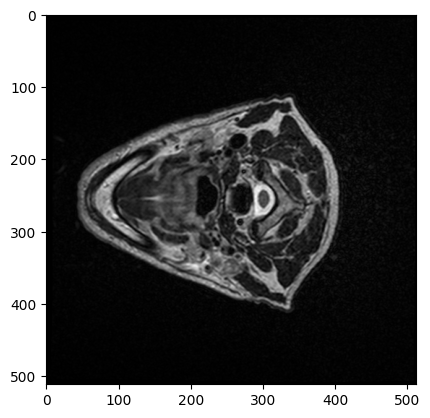

In [46]:
img_loader = LoadImage(image_only=True)
img_data = img_loader(data_midRT[0].get("mid_image_path"))
print(img_data.shape)
plt.imshow(img_data[:, :, 43], cmap='gray')

torch.Size([512, 512, 76])


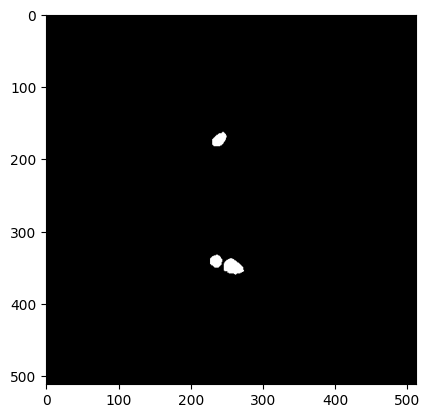

In [47]:
img_loader = LoadImage(image_only=True)
img_data = img_loader(data_midRT[0].get("mid_mask_path"))
print(img_data.shape)
plt.imshow(img_data[:, :, 43], cmap='gray')